In [ ]:
!pip install neuron
!pip install -U netpyne
import matplotlib

     |████████████████████████████████| 12.6MB 22.6MB/s 
     |████████████████████████████████| 317kB 23.6MB/s 


In [ ]:
%matplotlib inline


Start time:  2021-05-19 22:11:18.605467

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 40 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 379 
  Done; cell connection time = 0.04 s.
Adding stims...
  Number of stims on node 0: 20 
  Done; cell stims creation time = 0.00 s.
Recording 1 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 1.58 s; real-time ratio: 0.63.

Gathering data...
  Done; gather time = 0.02 s.

Analyzing...
  Cells: 40
  Connections: 399 (9.97 per cell)
  Spikes: 859 (21.48 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 1.58 s
  Done; saving time = 0.02 s.
Plotting raster...


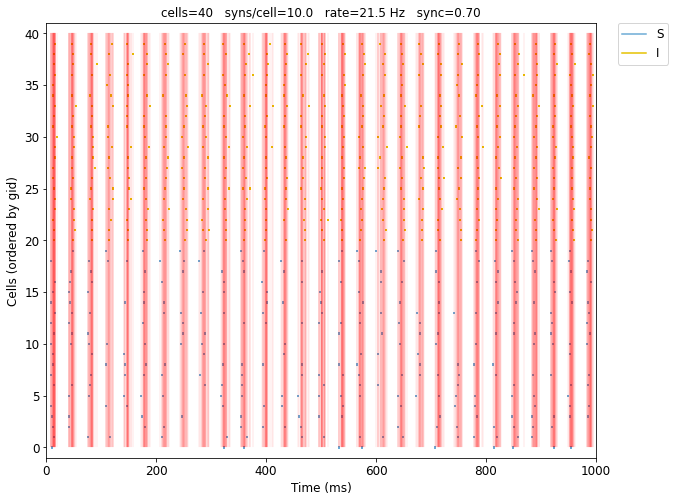

Plotting recorded cell traces ... cell


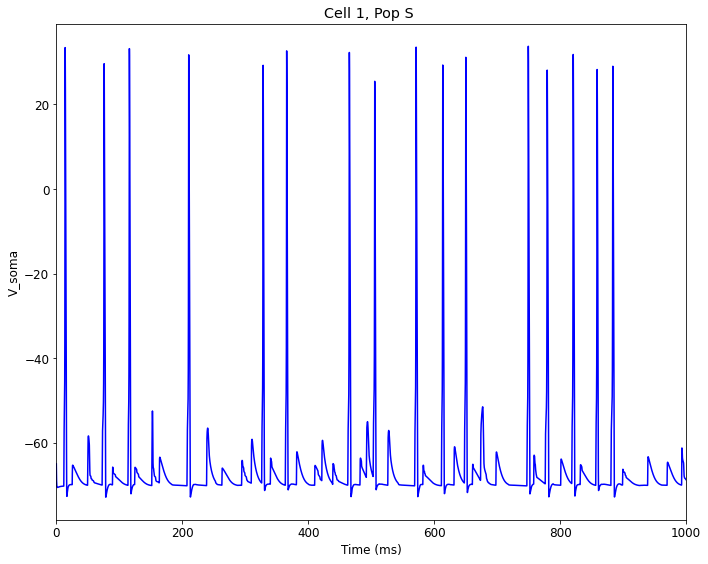

Plotting firing rate spectrogram ...


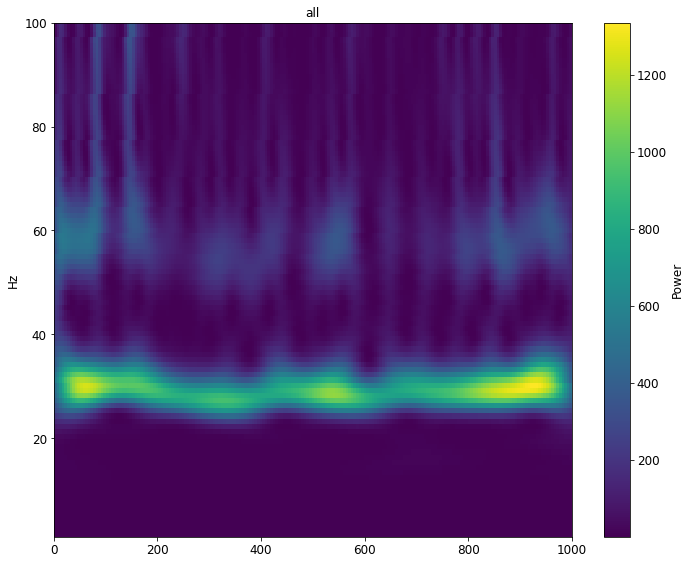

Plotting spike histogram...


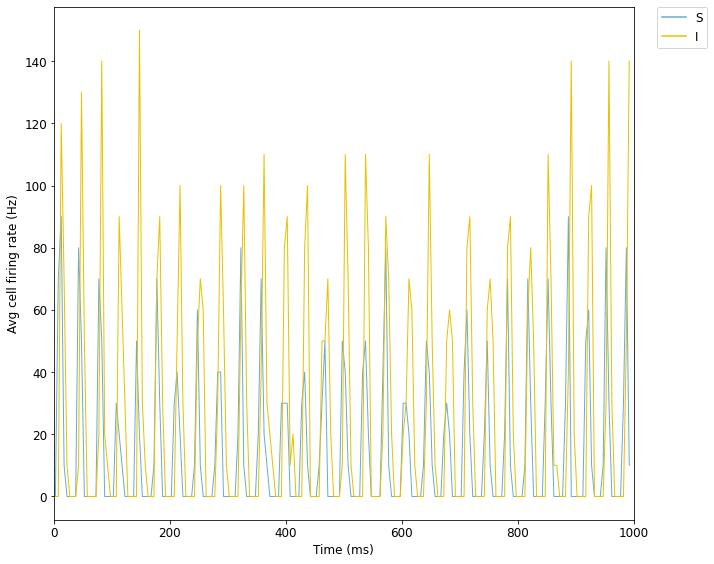

  Done; plotting time = 3.33 s

Total time = 5.02 s

End time:  2021-05-19 22:11:23.625533


In [ ]:
from netpyne import specs, sim

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

## Cell parameters/rules
PYRcell = {'secs': {}}
PYRcell['secs']['soma'] = {'geom': {}, 'mechs': {}}
PYRcell['secs']['soma']['geom'] = {
    'diam': 18.8,   
    'L': 18.8, 
    'Ra': 123.0}  # soma geometry
PYRcell['secs']['soma']['mechs']['hh'] = {
    'gnabar': 0.12, 
    'gkbar': 0.036, 
    'gl': 0.003, 
    'el': -70}  # soma hh mechanism
netParams.cellParams['PYR'] = PYRcell

## Population parameters
netParams.popParams['S'] = {
    'cellType': 'PYR', 
    'numCells': 20}
netParams.popParams['I'] = {
    'cellType': 'PYR', 
    'numCells': 20}

## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.1, 
    'tau2': 5.0, 
    'e': 0}  # excitatory synaptic mechanism

netParams.synMechParams['inh'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.1, 
    'tau2': 5.0, 
    'e': -70}  # inhibitory synaptic mechanism


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {
    'type': 'NetStim', 
    'rate': 50, 
    'noise': 0.5}
    
netParams.stimTargetParams['bkg->S'] = {
    'source': 'bkg', 
    'conds': {'pop': 'S'}, 
    'weight': 0.01, 
    'delay': 5, 
    'synMech': 'exc'}

## Cell connectivity rules
netParams.connParams['S->I'] = {    #  S -> I label
    'preConds': {'pop': 'S'},       # conditions of presyn cells
    'postConds': {'pop': 'I'},      # conditions of postsyn cells
    'divergence': 5,               # probability of connection
    'weight': 0.01,                 # synaptic weight
    'delay': 5,                     # transmission delay (ms)
    'synMech': 'exc'}               # synaptic mechanism

netParams.connParams['I->S'] = {    #  I -> S label
    'preConds': {'pop': 'I'},       # conditions of presyn cells
    'postConds': {'pop': 'S'},      # conditions of postsyn cells
    'probability': 0.7,               # probability of connection
    'weight': 0.02,                 # synaptic weight
    'delay': 5,                     # transmission delay (ms)
    'synMech': 'inh'}               # synaptic mechanism


# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'tut2'  # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.saveJson = False

simConfig.analysis['plotTraces'] = {'include': [1], 'saveFig': True}  # Plot recorded traces for this list of cells
simConfig.analysis['plotRaster'] = {'showFig': True}                  # Plot a raster
simConfig.analysis['plotSpikeHist'] = {'showFig':True, 'include': ['S', 'I']}
simConfig.analysis['plotRateSpectrogram'] = {'include': ['all']}



# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)



Plotting spike stats...


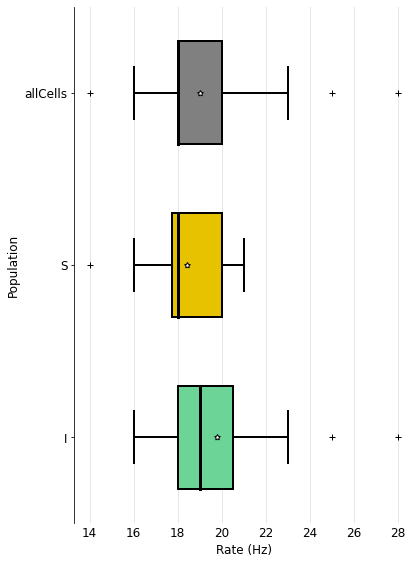

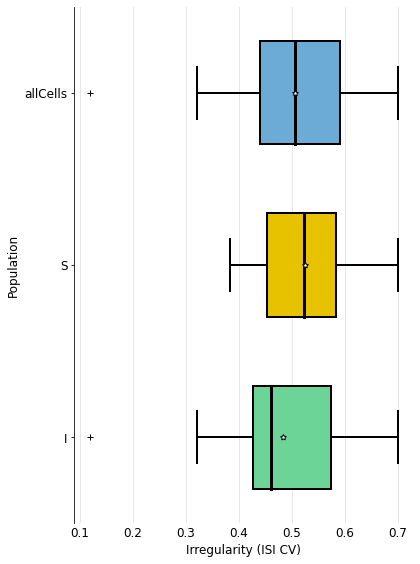

In [ ]:
sim.analysis.plotSpikeStats();


1) Start from netpyne tut_osc_start.py (in editor or Jupyter notebook)

2) Rename the 'M' pop to 'I' pop (inhibitory population) 

3) Add an inhibitory synapse called 'inh' with the same properties as 'exc', except equlibrium potential = -70

4) Increase background input ('bkg') rate to 50 Hz and target only the 'S' population: `'conds': {'pop': 'S'}`

5) Add spike histogram: `simConfig.analysis['plotSpikeHist'] = {'include': ['S', 'I']}`

6) Run the model

Why are some cells not spiking?

7) Change the connection S->M to S->I (you need to change both the label and the conditions!)

8) Reduce the S->I divergence to 1.

9) Add a connection I->S with probability: 0.7, weight: 0.02, delay: 5, synMech: 'inh'

10) Compare synchrony: add `'syncLines':True` to plotRaster

11) Modify parameters (weight, probability, delay, tau2,…) to get different levels of synchrony and oscillation frequencies

